In [2]:
import matplotlib.pyplot as plt
import numpy as np

0/1000


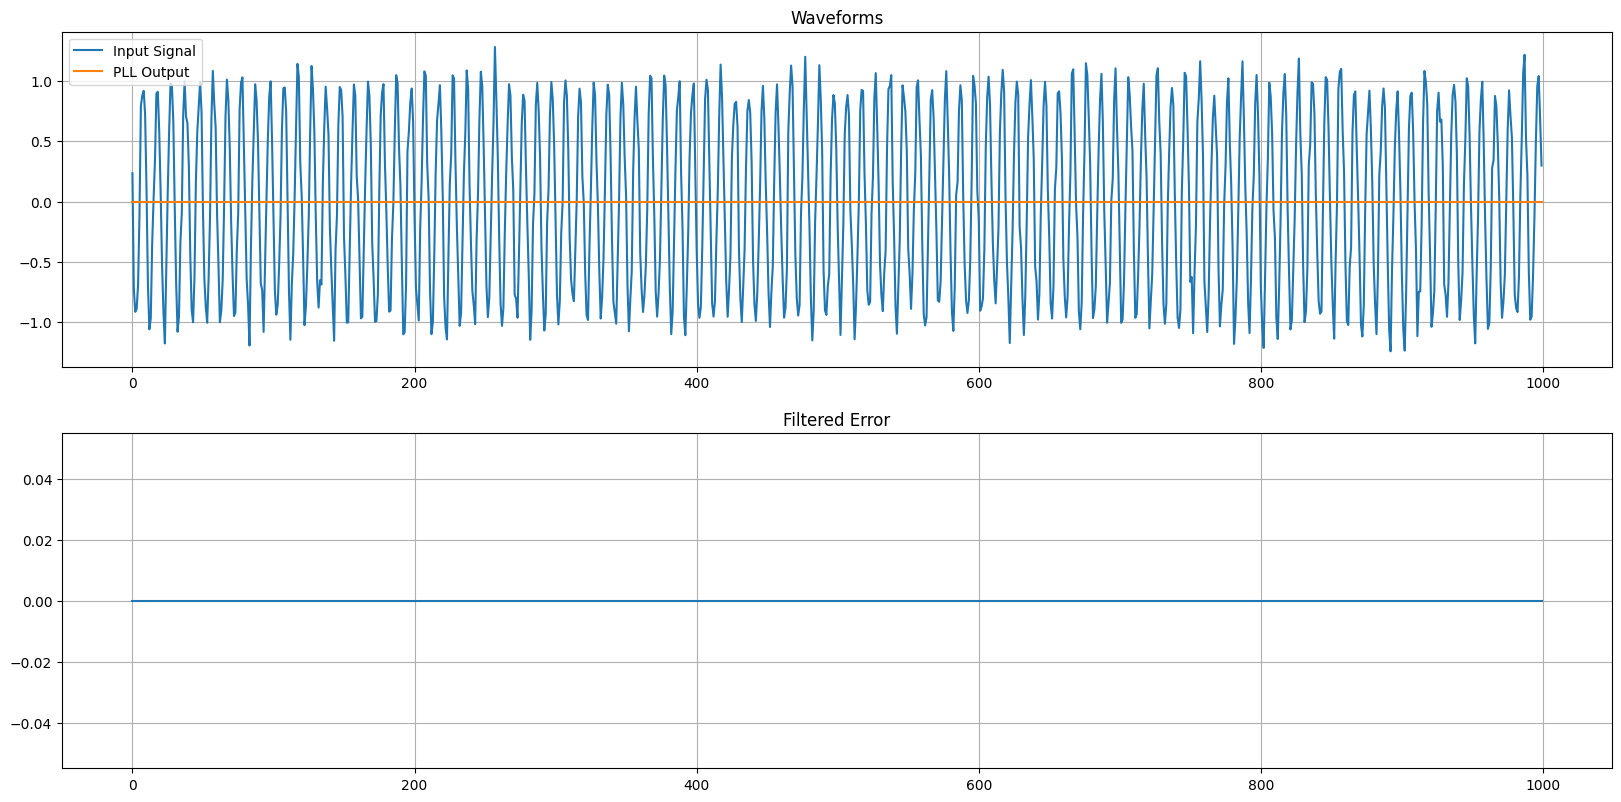

In [6]:
# https://liquidsdr.org/blog/pll-simple-howto/

import numpy as np
from scipy.signal import correlate

class PhaseDifferenceEstimator:
    def __init__(self, window_size):
        self.window_size = window_size
        self.signal1_buffer = np.zeros(window_size)
        self.signal2_buffer = np.zeros(window_size)
        self.phase_difference_rad = None

    def process_sample(self, sample1, sample2):
        s1 = sample1 + 0.0j
        s2 = sample2 + 0.0j
        
        self.phase_difference_rad = np.angle( s1 * np.conj(s2) )

    def get_phase_difference(self):
        return self.phase_difference_rad

class PhaseLockedLoop_Real:
    def __init__( self ) -> None:
        self.alpha = 0.05
        self.beta  = 0.5*self.alpha*self.alpha;
        self.phase_out     = 0.0
        self.frequency_out_Hz = 0
        self.fs = 100
        self.last_out = 0
        self.pde = PhaseDifferenceEstimator(window_size=4)

    def proc( self, in_, ):
        self.pde.process_sample( in_, self.last_out )
        phase_error = self.pde.get_phase_difference()
        
        self.last_out = np.sin( self.phase_out )
        
        self.phase_out += self.alpha * phase_error
        self.frequency_out_Hz += self.beta * phase_error
        
        self.phase_out += self.frequency_out_Hz * 2 * np.pi / self.fs
        if self.phase_out > 2*np.pi:
            self.phase_out -= 2*np.pi
        
        return self.last_out, phase_error

fs = int(100)
duration_secs = 10
t = np.linspace(0,duration_secs, int(duration_secs*fs))
# t = np.arange( 0,200 )

in_A      = 1
in_f      = 10
in_phi    = np.random.normal(0, 0.1, size=len(t)) + np.pi # Sprinkle in a little phase noise
in_sig    = in_A * np.sin( 2*np.pi*in_f * t + in_phi)

in_sig +=  np.random.normal(0, 0.1, size=len(t)) # AWGN

e_D = [] #phase-error output
cos_out = []



pll = PhaseLockedLoop_Real(  )
for n in range(len(in_sig)):
    if n % 1000 == 0:
        print( f"{n}/{len(in_sig)}" )
    out_sig, _e_D = pll.proc( in_sig[n] )

    cos_out.append( out_sig )
    e_D.append( _e_D )



# Create a Figure
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot(in_sig, label='Input Signal')
ax1.plot(cos_out, label='PLL Output')
plt.grid()
plt.legend()
ax1.set_title('Waveforms')

# Show the plot
#plt.show()

ax2 = fig.add_subplot(412)
ax2.plot( e_D )
plt.grid()
ax2.set_title('Filtered Error')
plt.show()

0/500


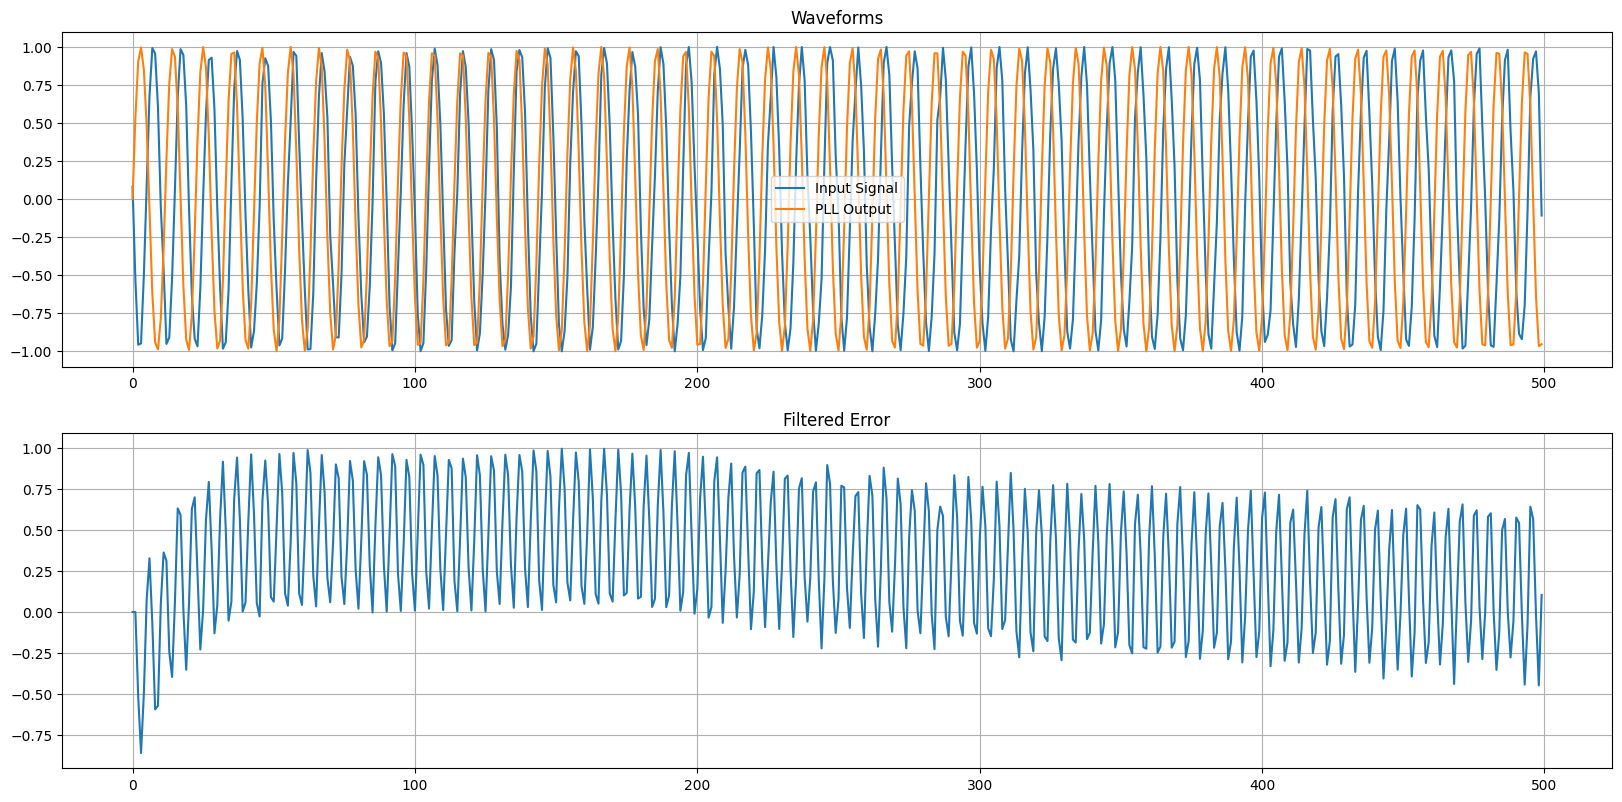

In [17]:
# https://liquidsdr.org/blog/pll-simple-howto/

import numpy as np
from scipy.signal import correlate

class PhaseDifferenceEstimator:
    def __init__(self, window_size):
        pass

    def process_sample(self, sample1, sample2):
        self.phase_difference_rad = sample1 * sample2

    def get_phase_difference(self):
        return self.phase_difference_rad

class PhaseLockedLoop_Real:
    def __init__( self ) -> None:
        self.alpha = 0.1
        self.beta  = 0.5*self.alpha*self.alpha;
        self.phase_out     = 0
        self.frequency_out_Hz = 9
        self.fs = 100
        self.last_out = 0
        self.pde = PhaseDifferenceEstimator(window_size=4)

    def proc( self, in_, ):
        self.pde.process_sample( in_, self.last_out )
        phase_error = self.pde.get_phase_difference()
        
        self.last_out = np.sin( self.phase_out )
        
        self.phase_out += self.alpha * phase_error
        self.frequency_out_Hz += self.beta * phase_error
        
        self.phase_out += self.frequency_out_Hz * 2 * np.pi / self.fs
        if self.phase_out > 2*np.pi:
            self.phase_out -= 2*np.pi
        
        return self.last_out, phase_error

fs = int(100)
duration_secs = 5
t = np.linspace(0,duration_secs, int(duration_secs*fs))
# t = np.arange( 0,200 )

in_A      = 1
in_f      = 10
in_phi    = np.random.normal(0, 0.1, size=len(t)) + np.pi # Sprinkle in a little phase noise
in_sig    = in_A * np.sin( 2*np.pi*in_f * t + in_phi)

# in_sig +=  np.random.normal(0, 0.1, size=len(t)) # AWGN

e_D = [] #phase-error output
cos_out = []



pll = PhaseLockedLoop_Real(  )
for n in range(len(in_sig)):
    if n % 1000 == 0:
        print( f"{n}/{len(in_sig)}" )
    out_sig, _e_D = pll.proc( in_sig[n] )

    cos_out.append( out_sig )
    e_D.append( _e_D )



# Create a Figure
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot(in_sig, label='Input Signal')
ax1.plot(cos_out, label='PLL Output')
plt.grid()
plt.legend()
ax1.set_title('Waveforms')

# Show the plot
#plt.show()

ax2 = fig.add_subplot(412)
ax2.plot( e_D )
plt.grid()
ax2.set_title('Filtered Error')
plt.show()